In [8]:
import os 
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def df_to_dict(df): 
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    dict={}
    for column in df.columns : 
        dict[column]=list(df[column])
    return dict

In [ ]:
# concatenate two df who have the same columns : 
def concat_df(df1, df2):
    if not df1.columns.equals(df2.columns):
        raise ValueError("Les deux DataFrames doivent avoir les mêmes colonnes."+str(df1.columns)+str(df2.columns))
    
    return pd.concat([df1, df2], axis=0)

In [9]:


def classify(point, pandemic) : 
    if pandemic[point] < 100 : 
        return ('stable')
    der = (1/7)*(pandemic[point+7] - pandemic[point]) / pandemic[point]
    derder=(1/49) * (pandemic[point + 7] + pandemic[point-7] - 2*pandemic[point] ) / pandemic[point]
    if  der < -0.05: 
        return  'big decrease'
    elif der <-0.03:
        return 'decrease'
    elif der < 0.03 :
        if abs(derder) > 0.003 : 
            return 'inflexion'
        else :
            return 'stable'
    elif der < 0.2 :
        return 'increase'
    else : 
        return 'big increase'
    

In [159]:
dicocolor={'big decrease':'green', 'decrease':'lightgreen', 'stable':'yellow', 'increase':'orange', 'big increase':'red', 'inflexion':'blue'}
colors_models={'ARIMA':'blue', 'Exponential':'red', 'Moving Average':'green', 'SIRH1':'yellow', 'SIRH2':'orange', 'SIRH3':'purple', 'SIRH4':'pink', 'Linear Regression':'brown', 'Bayesian Regression':'black', 'VAR':'blue', 'Exponential Multi':'red', 'Moving Average Multi':'green', 'SIRH Multi1':'yellow', 'SIRH Multi2':'orange'}

In [ ]:
xs=[5*i for i in range(1, 59)]

countstable=0
countdecrease=0
countincrease=0
countbigdecrease=0
countbigincrease=0
countinflexion=0

for mob in range(4): 
    for pand in range(5): 
        label_seen = {}

        df= pd.read_csv('./all_pandemics/pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        plt.plot(n_hospitalized)
        for x in xs : 
            if classify(x, n_hospitalized) == 'stable' : 
                countstable+=1
            if classify(x, n_hospitalized) == 'decrease' : 
                countdecrease+=1
            if classify(x, n_hospitalized) == 'increase' : 
                countincrease+=1
            if classify(x, n_hospitalized) == 'big decrease' : 
                countbigdecrease+=1
            if classify(x, n_hospitalized) == 'big increase' : 
                countbigincrease+=1
            if classify(x, n_hospitalized) == 'inflexion' : 
                countinflexion+=1
            label = classify(x, n_hospitalized)
            if label not in label_seen:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label], label=label)
                label_seen[label] = True
            else:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label])
        plt.title('mobility = '+str(mob)+', pandemic = '+str(pand))
        plt.legend()
        plt.show()

    
print('stable = ' +str(countstable))
print('decrease = ' +str(countdecrease))
print('increase = ' +str(countincrease))
print('big decrease = ' +str(countbigdecrease))
print('big increase = ' +str(countbigincrease))
print('inflexion = ' +str(countinflexion))


In [12]:
models1Dnames=['ARIMA', 'Exponential', 'Moving Average', 'SIRH1', 'SIRH2', 'SIRH3', 'SIRH4', 'Linear Regression', 'Bayesian Regression']
models3Dnames=[ 'VAR', 'Exponential Multi', 'Moving Average Multi', 'SIRH Multi1', 'SIRH Multi2']


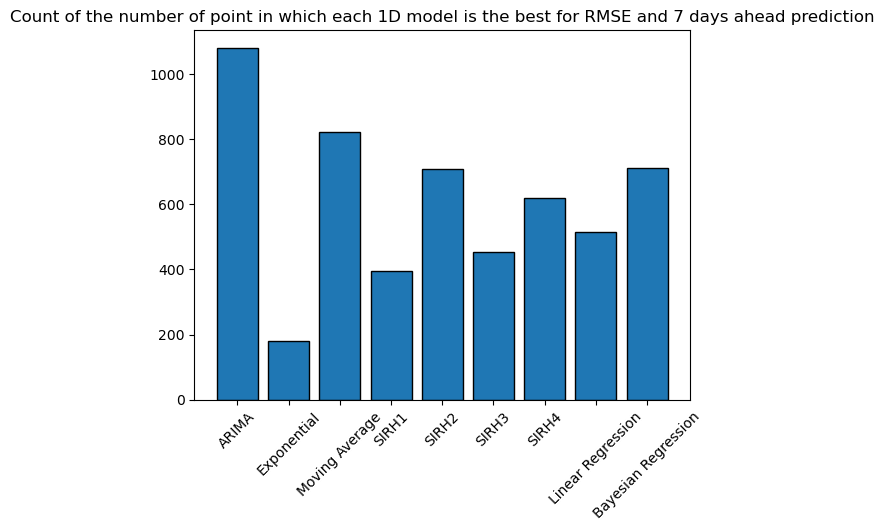

In [157]:

rmse_7_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if 'RMSE' in name and '7' in name and '1D' in name]

counts=[0 for i in range(len(models1Dnames))]


for name in rmse_7_1D: 
    dicoresults=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1

# histogramme des résultats 
plt.bar(models1Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 1D model is the best for RMSE and 7 days ahead prediction')
plt.show()


# rmse_14_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '14' in name and '1D' in name]

# counts=[0 for i in range(len(models1Dnames))]


# for name in rmse_14_1D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# # histogramme des résultats 
# plt.bar(models1Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 1D model is the best for RMSE and 14 days ahead prediction')
# plt.show()


# wis_7_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '7' in name and '1D' in name]
# counts=[0 for i in range(len(models1Dnames))]
# for name in wis_7_1D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1


# plt.bar(models1Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 1D model is the best for WIS and 7 days ahead prediction')
# plt.show()

# wis_14_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '14' in name and '1D' in name]
# counts=[0 for i in range(len(models1Dnames))]
# for name in wis_14_1D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1


# plt.bar(models1Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 1D model is the best for WIS and 14 days ahead prediction')
# plt.show()



# rmse_7_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '7' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in rmse_7_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for RMSE and 7 days ahead prediction')
# plt.show()


# rmse_14_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '14' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in rmse_14_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for RMSE and 14 days ahead prediction')
# plt.show()


# wis_7_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '7' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in wis_7_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for WIS and 7 days ahead prediction')
# plt.show()


# wis_14_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '14' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in wis_14_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for WIS and 14 days ahead prediction')
# plt.show()


In [262]:
prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_7_days_on_pandemic_0_0.csv')
prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
prediction.index=[20*i for i in range(1, 15)]
prediction.drop('Exponential', axis=1, inplace=True)
prediction.drop('Exponential Multi', axis=1, inplace=True)
prediction.drop('Real values', axis=1, inplace=True)
prediction.loc[20].mean()

4.714170108003656

In [301]:
reach = 7 
mob = 0 
pand = 0 
prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
prediction.index=[20*i for i in range(1, 15)]
# prediction.drop('Exponential', axis=1, inplace=True)
# prediction.drop('Exponential Multi', axis=1, inplace=True)
prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)

# real_values= prediction['Real values']
prediction_all=prediction
prediction=prediction_bis

prediction_all

,ARIMA,Exponential,Moving Average,SIRH1,SIRH2,SIRH3,SIRH4,Linear Regression,Bayesian Regression,VAR,Exponential Multi,Moving Average Multi,SIRH Multi1,SIRH Multi2,Real values
20,1.333150,1.306084e+01,1.571429,9.827810,8.803629,8.041876,7.892291,1.571429,2.004281,4.668383,1.571429e+00,1.571429,4.432150,4.852185,5.0
40,21.171660,8.910218e+01,33.714286,99.661023,20.798143,31.471588,25.320916,233.950403,-13.670664,54.080831,4.728754e+01,33.714286,51.381132,42.313275,64.0
60,117.895315,-1.538406e+15,100.000000,54.749639,105.679948,94.942743,123.409355,263.986714,122.335549,128.350007,1.098307e+02,100.000000,125.911428,116.701097,138.0
80,243.873279,3.400776e+24,192.857143,113.847490,210.948970,217.282122,236.772141,272.274413,272.441030,264.962311,2.315097e+02,192.857143,279.655080,245.303962,278.0
100,475.096136,2.414255e+32,397.714286,287.538600,461.237094,373.698402,557.602643,561.571618,567.245932,633.674161,5.710016e+02,397.714286,685.673605,397.714286,590.0
120,1622.019546,7.576325e+35,1044.714286,1067.903821,1297.751090,1108.614391,1550.775275,1838.795236,1871.396268,1725.616731,2.048899e+03,1044.714286,1578.907208,1617.986632,1726.0
140,3973.043675,-4.537768e+50,2825.571429,3295.658866,3557.078504,3225.002198,4246.744736,4260.198763,4256.288816,4190.049746,4.329011e+03,2825.571429,3486.457806,4037.393657,3972.0
160,6853.691433,-1.947235e+59,5535.142857,5656.357900,6364.627471,5774.823107,6702.287715,7010.955305,7082.867531,7077.657732,7.559936e+03,5535.142857,5710.766327,6979.057608,6988.0
180,10026.704037,-2.831161e+67,8438.571429,7888.889101,9215.669998,8254.002225,9552.248510,10263.872875,10201.986588,10539.913288,-9.335441e+13,8438.571429,8784.508491,10443.500212,10416.0
200,17592.593012,1.925866e+77,13419.000000,8237.941360,14914.994220,12372.471380,15756.856993,17939.565724,17900.820926,17626.187980,3.297475e+21,13419.000000,13419.000000,16871.445643,18219.0


In [328]:
def get_classement(maliste): 
    return [sorted(maliste).index(i) for i in (maliste)]
maliste=[ 7.2,1, 4, 9, 3]
print(get_classement(maliste))


[3, 0, 2, 4, 1]


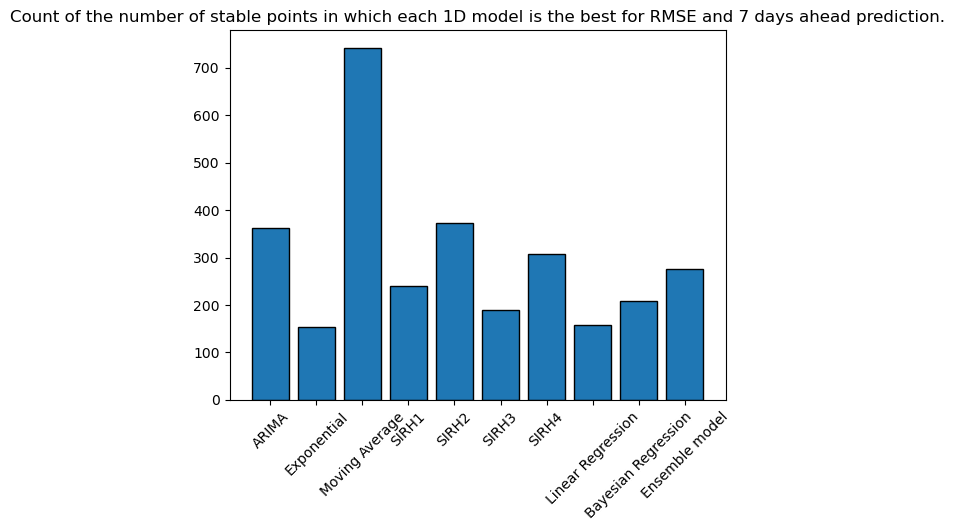

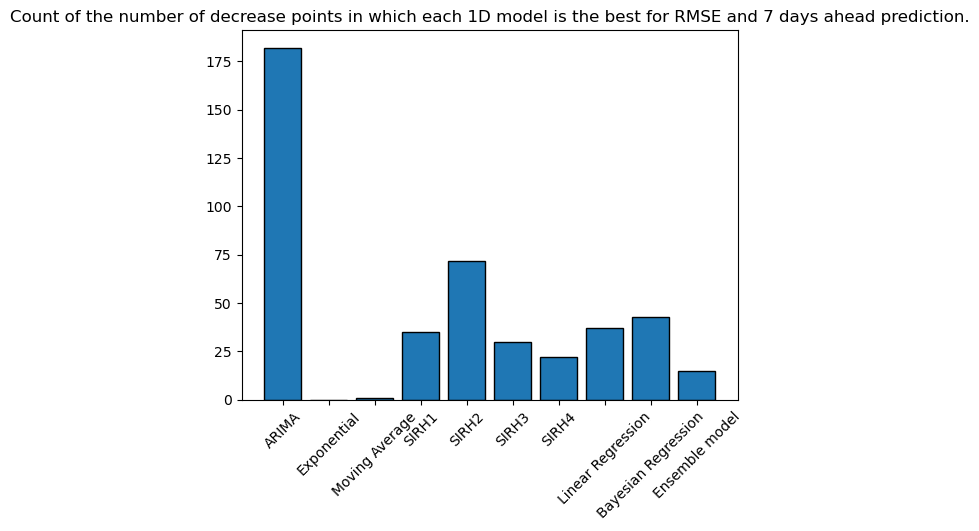

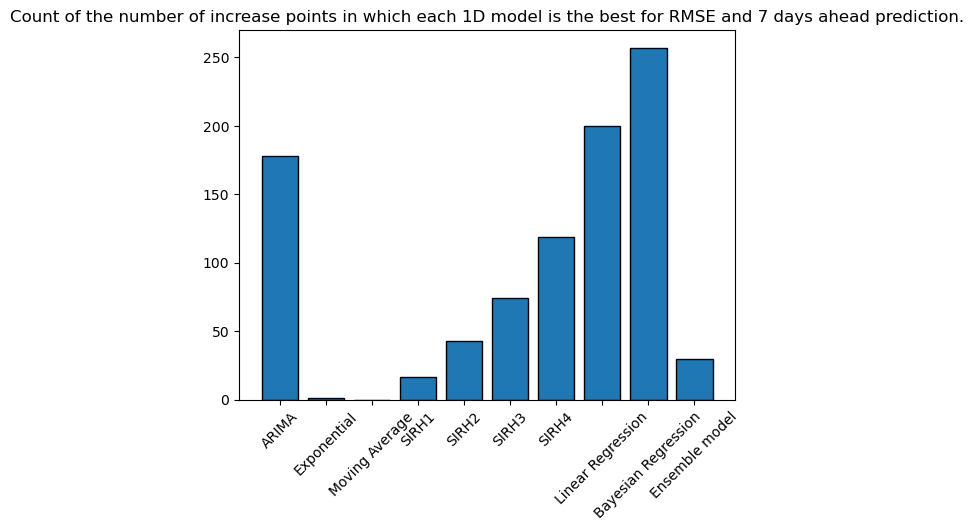

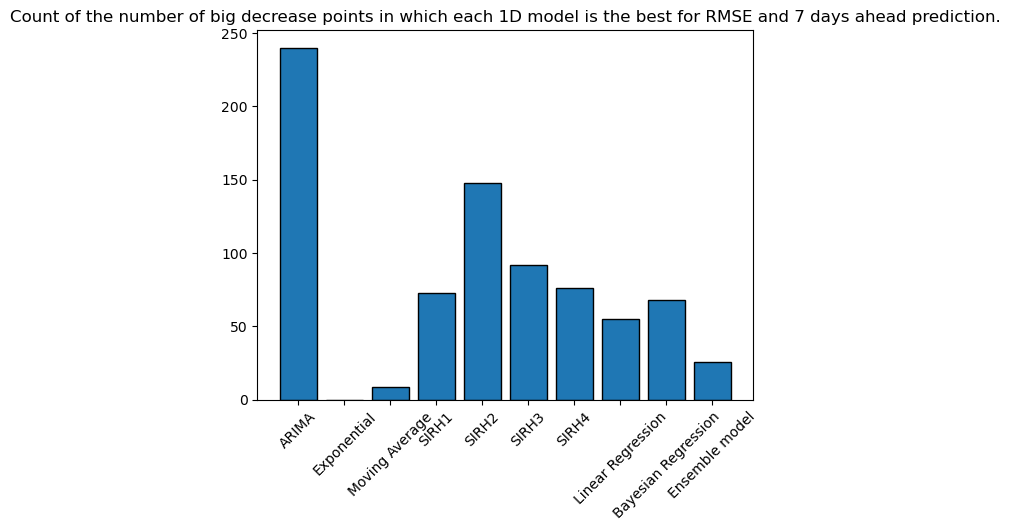

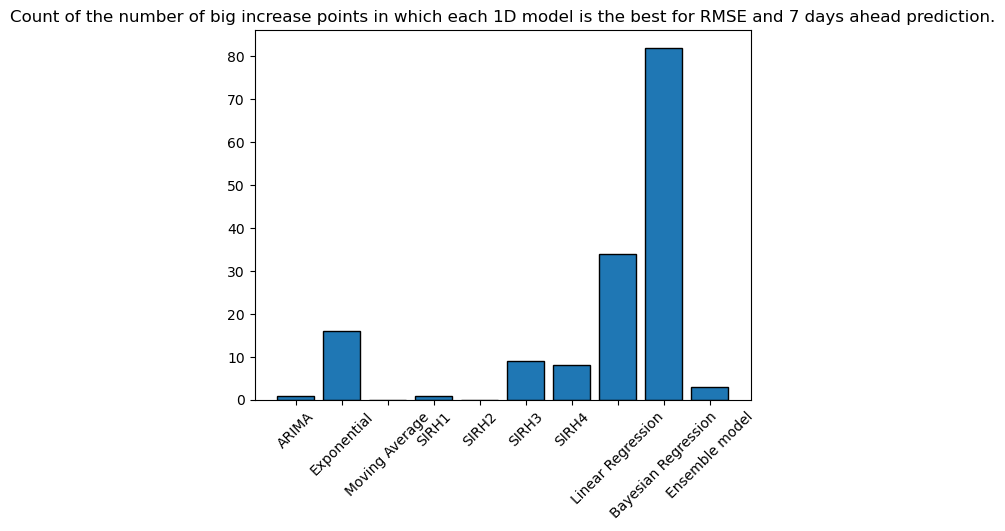

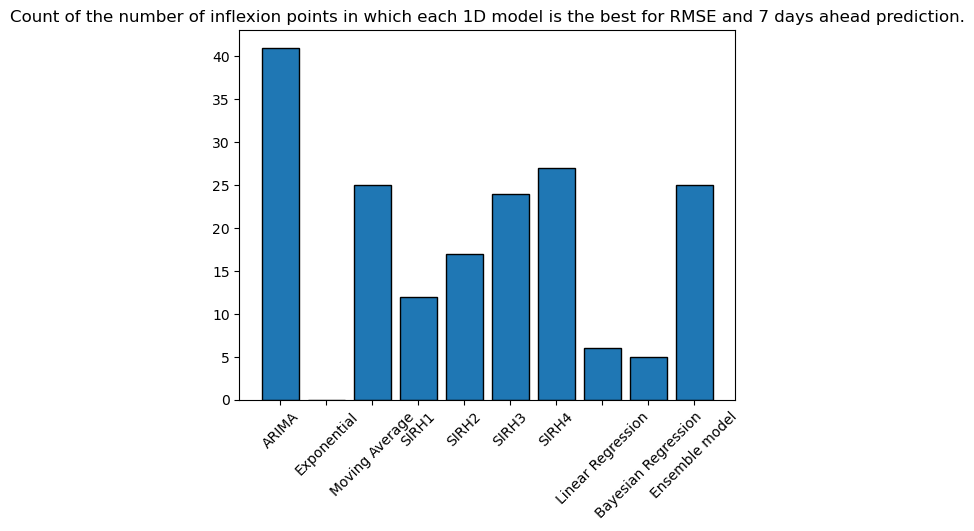

In [317]:
model_type='1D'
loss='RMSE'
reach='7'

for label_point in ['stable', 'decrease', 'increase', 'big decrease', 'big increase', 'inflexion']:
    if model_type == '3D':
        list_of_models=models3Dnames
    else:
        list_of_models=models1Dnames
    counts=[0 for i in range(len(list_of_models) +1)]
    results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and reach in name and model_type in name]
    for name in results_list :
        mob=int(name.split('_')[-5])
        pand=int(name.split('_')[-4])
        prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
        prediction.index=[20*i for i in range(1, 15)]
        prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
        prediction_all=prediction
        prediction=prediction_bis
        dicoresults=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
        df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        indexs_points=[[20*i] for i in range(1, 15) ] 
        for point in indexs_points: 
            if classify(point[0], n_hospitalized) == label_point :
                ensemble_value=prediction.loc[point[0]].mean() 
                best_model=(list_of_models[np.argmin(dicoresults[str(point)])])
                pred_best_mod=prediction_all[best_model].loc[point[0]]
                real_value=prediction_all['Real values'].loc[point[0]]
                ensemble_perf=np.abs(ensemble_value-real_value)
                best_mod_perf=np.abs(pred_best_mod-real_value)
                if ensemble_perf < best_mod_perf :
                    counts[-1]+=1
                else :
                    counts[np.argmin(dicoresults[str(point)])]+=1
    
    plt.bar(list_of_models + ['Ensemble model'], counts, edgecolor='black')
    plt.xticks(rotation=45)
    plt.title('Count of the number of '+label_point+' points in which each '+model_type+' model is the best for '+loss+' and '+reach+' days ahead prediction.')
    plt.show()


CLASSEMENTS SSSSSSSSSSSSSSSSSS

In [330]:
model_type='1D'
loss='RMSE'
reach='7'

for label_point in ['stable', 'decrease', 'increase', 'big decrease', 'big increase', 'inflexion']:
    all_ranks=np.array([0 for i in range(len(models1Dnames)+1)])
    if model_type == '3D':
        list_of_models=models3Dnames
    else:
        list_of_models=models1Dnames
    counts=[0 for i in range(len(list_of_models) +1)]
    results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and reach in name and model_type in name]
    for name in results_list :
        mob=int(name.split('_')[-5])
        pand=int(name.split('_')[-4])
        prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
        prediction.index=[20*i for i in range(1, 15)]
        prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
        prediction_all=prediction
        prediction=prediction_bis
        dicoresults=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
        df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        indexs_points=[[20*i] for i in range(1, 15) ] 
        for point in indexs_points: 
            if classify(point[0], n_hospitalized) == label_point :
                ensemble_value=prediction.loc[point[0]].mean() 
                best_model=(list_of_models[np.argmin(dicoresults[str(point)])])
                pred_best_mod=prediction_all[best_model].loc[point[0]]
                real_value=prediction_all['Real values'].loc[point[0]]
                ensemble_perf=np.abs(ensemble_value-real_value)
                best_mod_perf=np.abs(pred_best_mod-real_value)
                if ensemble_perf < best_mod_perf :
                    counts[-1]+=1
                else :
                    counts[np.argmin(dicoresults[str(point)])]+=1
    
    plt.bar(list_of_models + ['Ensemble model'], counts, edgecolor='black')
    plt.xticks(rotation=45)
    plt.title('Count of the number of '+label_point+' points in which each '+model_type+' model is the best for '+loss+' and '+reach+' days ahead prediction.')
    plt.show()


[3.6668501834789216, 8.06083555394599, 3.428571428571429, 4.827810373517014, 3.803629431172615, 3.041876473504089, 2.8922910078345385, 3.428581428571429, 2.9957194788178394]
[42.8283401290904, 25.102176319390157, 30.285714285714285, 35.66102340032171, 43.20185684136577, 32.528412389729226, 38.67908378832913, 169.95040319288762, 77.67066442862387]
[134.3085673769665, 1.9472354461076125e+59, 1452.8571428571431, 1331.6421003488167, 623.3725290461753, 1213.1768928718084, 285.71228532050554, 22.95530526316361, 94.86753082569705]
[389.2959625130789, 2.831161085297585e+67, 1977.4285714285704, 2527.1108987881707, 1200.330001853792, 2161.997774559344, 863.7514902225357, 152.12712472215753, 214.0134115013734]
[660.2285505318869, 1.6198306258292654e+85, 2876.8571428571413, 2876.857152857141, 702.6744689845, 4023.205166482712, 88.41097626785995, 462.1956828028415, 525.7633207217877]
[70.16008819909621, 9.5085081810186e+93, 3144.5714285714275, 3144.571438571428, 3107.337138583429, 1990.91540540654,

KeyboardInterrupt: 

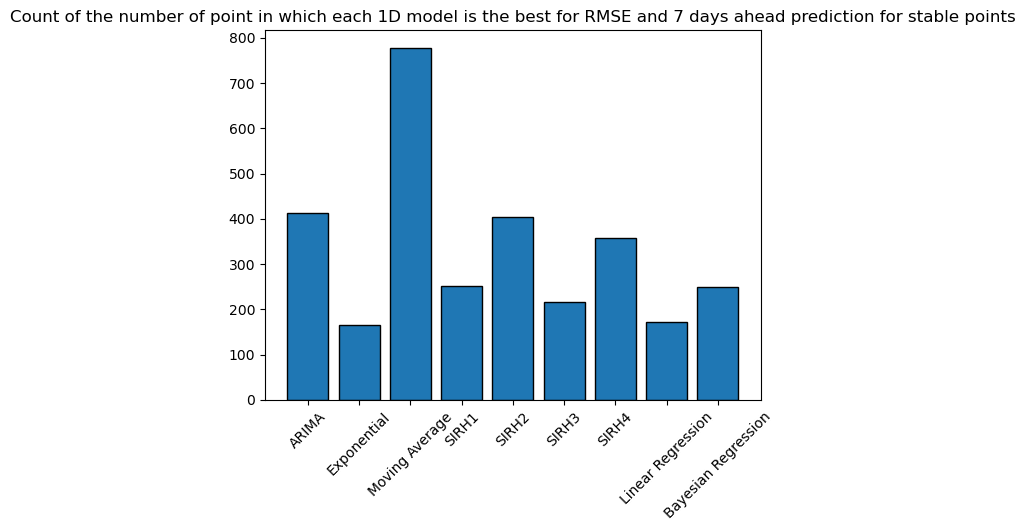

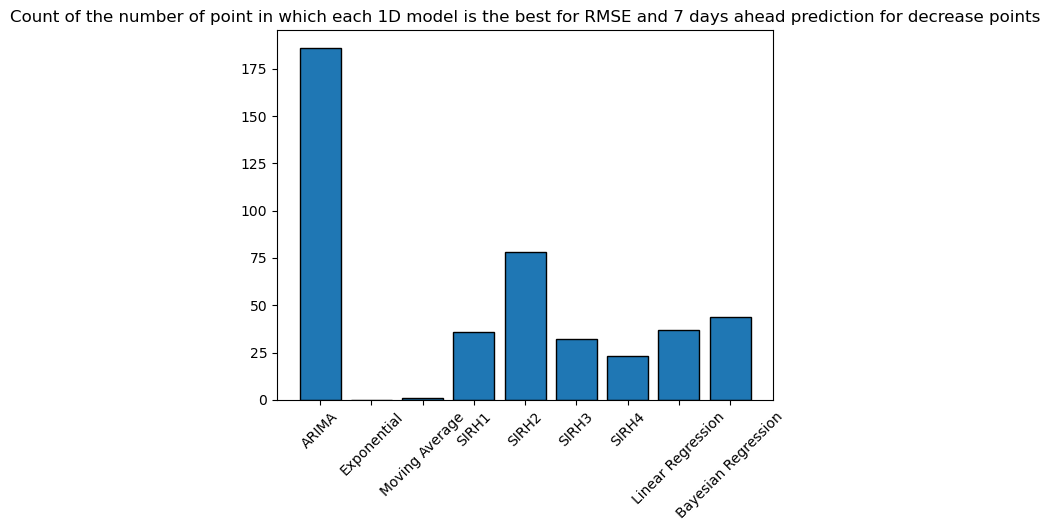

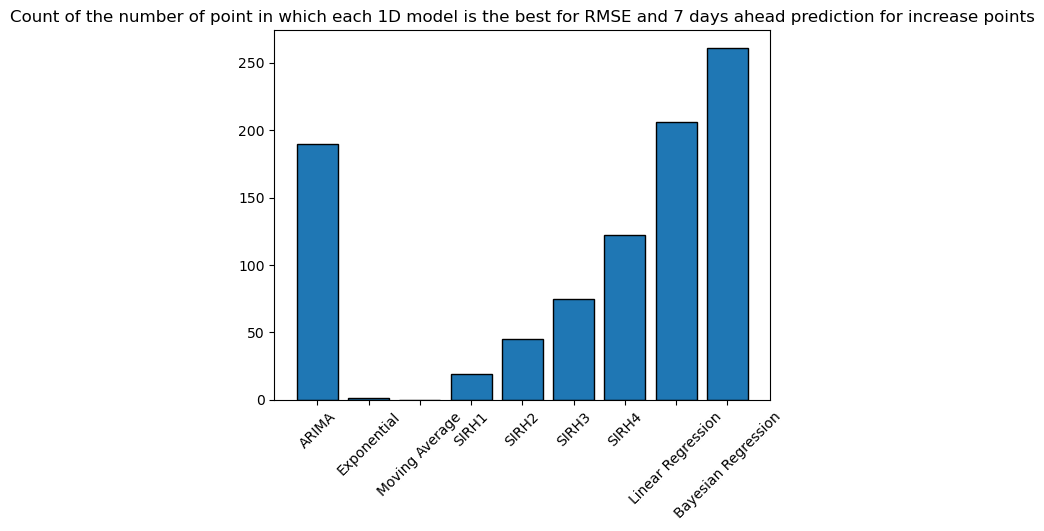

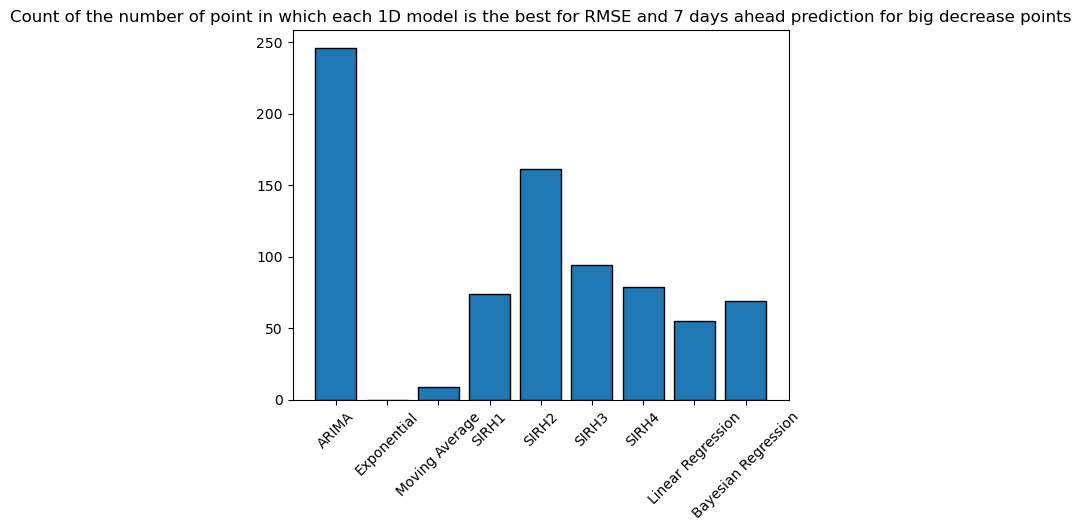

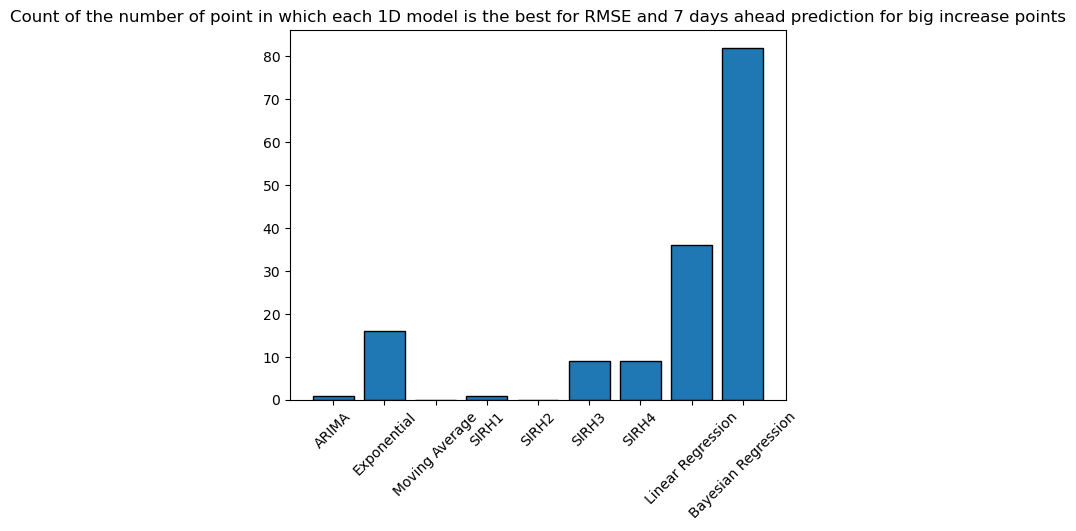

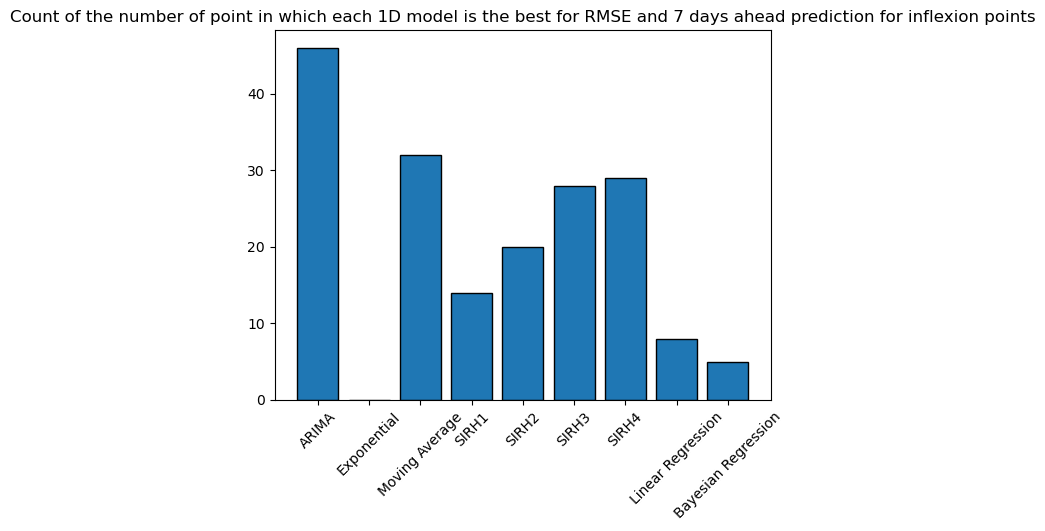

In [56]:
for model_type in ['1D', '3D']:
    for loss in ['RMSE', 'WIS'] :
        for reach in ['7', '14']: 
            for label_point in ['stable', 'decrease', 'increase', 'big decrease', 'big increase', 'inflexion']:
                if model_type == '3D':
                    list_of_models=models3Dnames
                else:
                    list_of_models=models1Dnames
                counts=[0 for i in range(len(list_of_models))]
                results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and reach in name and model_type in name]
                for name in results_list : 
                    # dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
                    dicoresults=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
                    df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                    df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                    df.drop(['Unnamed: 0'], axis=1, inplace=True)
                    n_hospitalized = np.array(df.loc['n_hospitalized'])
                    indexs_points=[[20*i] for i in range(1, 15) ] 
                    for point in indexs_points: 
                        if classify(point[0], n_hospitalized) == label_point : 
                            counts[np.argmin(dicoresults[str(point)])]+=1
                
                plt.bar(list_of_models, counts, edgecolor='black')
                plt.xticks(rotation=45)
                plt.title('Count of the number of point in which each '+model_type+' model is the best for '+loss+' and '+reach+' days ahead prediction for '+label_point+' points')
                plt.show()


In [252]:


def plot_pandemic(reach = 7 , mob = 0 , pand = 0 , type_of_model= '1D', loss='RMSE') : 

    df=pd.read_csv('./all_pandemics/pandemic_'+str(mob)+str('_')+str(pand)+'.csv')
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    n_hospitalized= np.array(df.loc[0])
    plt.plot(n_hospitalized)


    results=pd.read_csv('./results/global_evaluation_from_zero_corrected/evaluation_with_'+loss+'_of_'+type_of_model+'_models_on_pandemic_'+str(mob)+str('_')+str(pand)+'_and_reach_='+str(reach)+'.csv')
    results.drop(['Unnamed: 0'], axis=1, inplace=True)
    if type_of_model == '3D':
        models_names=models3Dnames
    elif type_of_model == '1D':
        models_names=models1Dnames
    results.index=models_names
    predictions=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+str('_')+str(pand)+'.csv')
    predictions.drop(['Unnamed: 0'], axis=1, inplace=True)
    predictions.index=[20 * i for i in range(1, 15)]
    label_dones=[]
    for point in results.columns :
        best_model=models_names[np.argmin(results[point])]
        id=int(point.split('[')[1].split(']')[0])
        if best_model not in label_dones : 
            plt.plot(id + reach, predictions[best_model].loc[id], 'o',color=colors_models[best_model],  label=best_model)
            label_dones.append(best_model)
        else : 
            plt.plot(id + reach, predictions[best_model].loc[id], 'o',color=colors_models[best_model])

    plt.title('Best '+type_of_model+' models according to '+loss+' and their predictions on pandemic ' + str(mob) + ' ' + str(pand))  
    plt.xlabel('Days')
    plt.ylabel('Number of hospitalized')
    plt.legend()
    plt.show()



In [194]:
prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_7_days_on_pandemic_0_0.csv')
prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
prediction.index=[20 * i for i in range(1, 15)]
prediction

prediction2=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_7_days_on_pandemic_0_1.csv')
prediction2.drop(['Unnamed: 0'], axis=1, inplace=True)
prediction2.index=[20 * i for i in range(1, 15)]
prediction2



,ARIMA,Exponential,Moving Average,SIRH1,SIRH2,SIRH3,SIRH4,Linear Regression,Bayesian Regression,VAR,Exponential Multi,Moving Average Multi,SIRH Multi1,SIRH Multi2,Real values
20,0.132984,9.504470e+00,0.714286,5.717965,5.249334,3.901398,4.289988,0.714286,0.963053,2.113133,7.142857e-01,0.714286,2.421123,2.323102,2.0
40,12.154926,1.347070e+01,7.428571,19.211028,17.819644,8.894745,8.140003,21.763344,21.722641,10.461497,7.797953e+00,7.428571,9.840593,9.918155,15.0
60,31.986087,-1.538406e+15,29.000000,21.837602,19.104797,47.370101,48.796223,-6.278041,53.756682,43.525139,5.139429e+01,29.000000,29.558464,35.952950,34.0
80,45.883227,3.400776e+24,42.142857,20.830609,13.740314,36.996254,46.147202,20.373181,23.054288,53.537107,5.239661e+01,42.142857,56.818802,51.753562,48.0
100,54.563137,2.414255e+32,51.285714,24.457282,16.538183,44.494272,53.406588,54.201258,55.667872,58.145417,6.270972e+01,51.285714,86.617983,51.285714,86.0
120,151.322320,7.576325e+35,122.857143,102.594051,97.468265,153.183696,122.857143,177.660842,169.020125,170.912509,5.410387e+01,122.857143,173.775564,160.853449,171.0
140,261.179467,-4.537768e+50,221.428571,180.197177,176.846722,288.001192,284.564488,293.112429,289.660054,287.943400,3.533545e+02,221.428571,261.872737,221.428571,263.0
160,356.962583,-1.947235e+59,340.571429,259.540138,395.274088,396.333877,399.395457,409.528493,410.659342,401.200877,4.727677e+02,340.571429,369.278063,366.078752,408.0
180,527.018921,-2.831161e+67,484.428571,379.970423,522.335549,543.316051,552.950627,599.585182,596.699577,618.086426,-3.363073e+17,484.428571,665.073468,638.979541,580.0
200,1211.072153,1.925866e+77,834.285714,733.375284,964.402608,957.037813,1074.938120,1282.389277,1274.707608,1292.524867,1.194072e+03,834.285714,1265.924993,1210.112667,1350.0


In [235]:
concatenated=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name])
names = [name for name in os.listdir('./results/predictions_of_the_models_corrected/') if '7_days' in name]
for name in names : 
    prediction=pd.read_csv('./results/predictions_of_the_models_corrected/'+name)
    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
    prediction.drop(['Exponential'], axis=1, inplace=True)
    prediction.drop(['Exponential Multi'], axis=1, inplace=True)
    
    prediction.index=[20 * i for i in range(1, 15)]
    concatenated=concat_df(concatenated, prediction)
matric=np.array(concatenated)

R2 :  -10.284266278362034
Coefficients :  [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
Intercept :  0


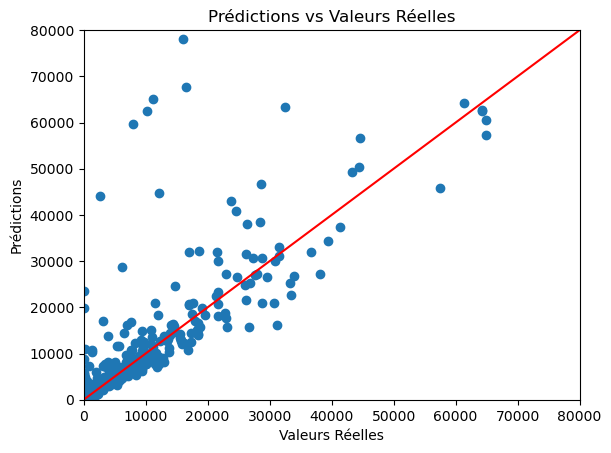

In [244]:
import numpy as np
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Supposons que matric soit votre matrice de données
# X=matric[:,:-1]
# y=matric[:,-1]


X = matric[:, :-1]
y = matric[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction de coût pour la régression linéaire
def cost_function(coefs, X, y):
    predictions = np.dot(X, coefs)
    mse = mean_squared_error(y, predictions)
    return mse

# Contraintes : somme des coefficients = 1 et coefficients >= 0
constraints = ({'type': 'eq', 'fun': lambda coefs: np.sum(coefs) - 1})
bounds = [(0, None) for _ in range(X_train.shape[1])]

# Initialisation des coefficients
initial_coefs = np.ones(X_train.shape[1]) / X_train.shape[1]

# Optimisation
result = minimize(cost_function, initial_coefs, args=(X_train, y_train), method='SLSQP', bounds=bounds, constraints=constraints)

# Coefficients optimisés
optimized_coefs = result.x

# Prédictions
y_pred = np.dot(X_test, optimized_coefs)

# Évaluation
print('R2 : ', r2_score(y_test, y_pred))
print('Coefficients : ', optimized_coefs)
print('Intercept : ', 0)  # Intercept est considéré comme 0 dans ce cas

# Graphique des prédictions vs valeurs réelles
plt.plot(y_test, y_pred, 'o')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs Réelles')
plt.plot([i for i in range(80000)], [i for i in range(80000)], color='red')
plt.xlim([0, 80000])
plt.ylim([0, 80000])
plt.show()


MSE :  89295641.56803934
MAE :  5264.88415024633
R2 :  0.007112459607594324
Coefficients :  [ 7.62438642e-196 -2.16717049e-108  4.96059873e-214  6.05316383e-196
  8.01811965e-196  7.52236563e-196  7.94128999e-196  5.11851513e-196
  7.35210687e-196  7.29208345e-196  1.01801257e-100  6.34692849e-196
  5.64112117e-196  2.70095190e-195]
Intercept :  4059.6188788732907


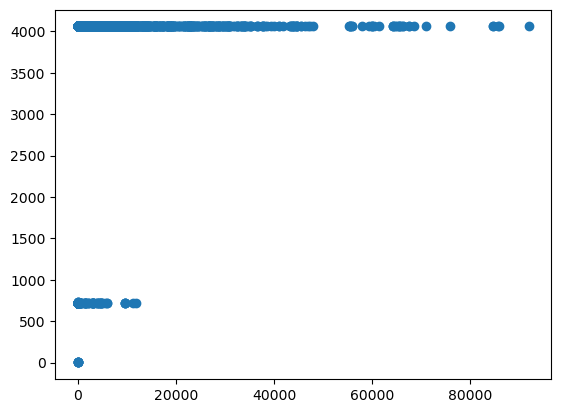

In [205]:
# regression lineaire pour prédire la dernière colonne de matric avec les autres : 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# rl : 
X=matric[:,:-1]
y=matric[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print('R2 : ', r2_score(y_test, y_pred))
print('Coefficients : ', regressor.coef_)
print('Intercept : ', regressor.intercept_)
plt.plot(y_test, y_pred, 'o')
plt.show()


Next cells to correct infs in the dataframes

In [155]:
if False : 
    names = os.listdir('./results/global_evaluation_from_zero/') 
    for name in names: 
        df=pd.DataFrame(json.load(open('./results/global_evaluation_from_zero/'+name)))
        if len(df.index) == 9 : 
            df.index=models1Dnames
        elif len(df.index) == 5 :
            df.index=models3Dnames
        else : 
            raise ValueError('error')

        for col in df.columns: 
            for row in df.index: 
                if df[col][row]==np.inf: 
                    if len(df.index) == 9 : 
                        df[col][row]=df[col]['Moving Average'] + 0.00001
                    elif len(df.index) == 5 :
                        df[col][row]=df[col]['Moving Average Multi'] + 0.00001
                    else : 
                        raise ValueError('error')
        if '1D' in name : 
            df.index=[i for i in range(9)]
        elif '3D' in name : 
            df.index=[i for i in range(5)]
        else : 
            raise ValueError('error')
        df.to_csv('./results/global_evaluation_from_zero_corrected/'+name.split('.')[0]+'.csv')


In [ ]:
if False: 
    names = os.listdir('./results/predictions_of_the_models/')
    for name in names : 
        df=pd.read_csv('./results/predictions_of_the_models/'+name)
        df=df.set_index('Unnamed: 0')

        for col in df.columns:
            for row in df.index: 
                if df[col][row]==np.inf: 
                    df[col][row]=df['Moving Average'][row]

        df.to_csv('./results/predictions_of_the_models_corrected/'+name)
